In [20]:
import importlib
import versDV as dv
import deviatoire as dev
from math import pi, sin, cos
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(dv)
importlib.reload(dev)

<module 'deviatoire' from '/root/DangVan/old/deviatoire.py'>

In [21]:

points1 = dv.nuage(100, 2*dv.pi, 0.01, 1)
points2 = dv.nuageOrt(100, 2*dv.pi, 0.01, 1)
    

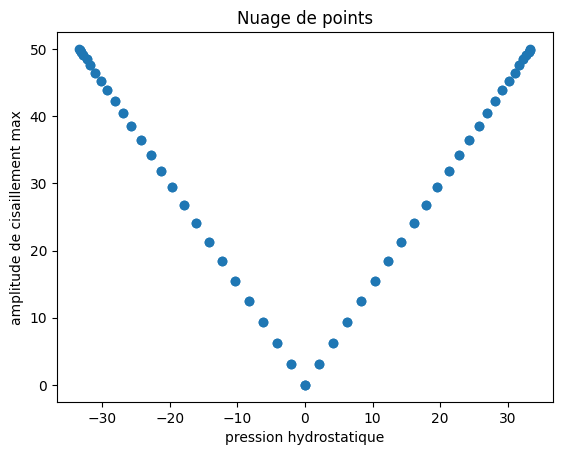

In [22]:
dv.traceNuage(points1)

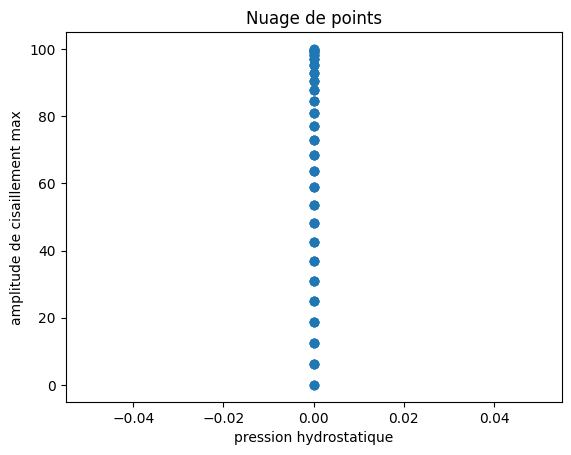

In [23]:
dv.traceNuage(points2)


In [24]:
matTens=dv.load_tens_from_csv('./datas/tensors_uniaxial.csv')
matDev=dev.CalculMatDev(matTens)


In [25]:
dv.hydro(matTens[0]),matTens[0]

(np.float64(33.333333333333336), array([100.,   0.,   0.,   0.,   0.,   0.]))

In [26]:
dev.deviateur(matTens[0])


array([ 66.66666667, -33.33333333,   0.        ,   0.        ,
         0.        ])

In [27]:
dev.diametre(matTens)

(np.float64(200.0),
 array([ 66.66666667, -33.33333333,   0.        ,   0.        ,
          0.        ]),
 array([-66.66666667,  33.33333333,   0.        ,   0.        ,
          0.        ]))

In [31]:
Rec,centre=dev.recentre(matTens)
points3=np.array([dev.normeTresca(Rec[i]) for i in range(Rec.shape[0])]).T
# points3= np.vstack((points3, dv.hydro(Rec)))
points3
points4=np.array([dv.hydro(matTens[i]) for i in range(matTens.shape[0])]).T


In [29]:
centre


array([0., 0., 0., 0., 0.])

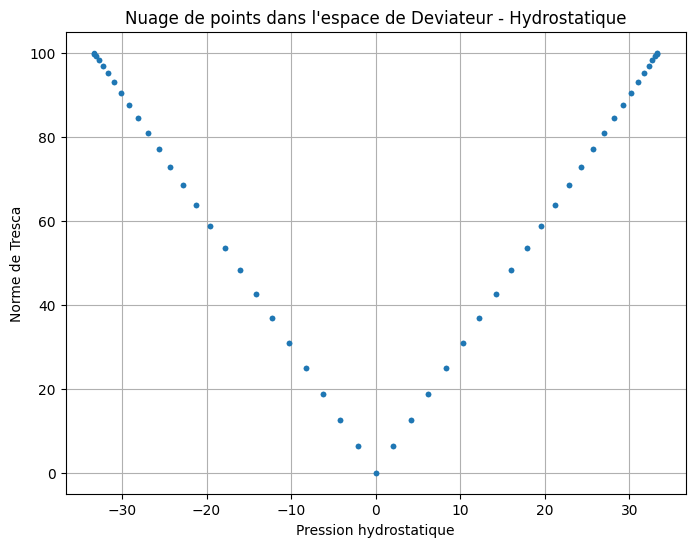

In [32]:
plt.figure(figsize=(8,6))
plt.plot(points4, points3,'.')
plt.ylabel("Norme de Tresca")
plt.xlabel("Pression hydrostatique")
plt.title("Nuage de points dans l'espace de Deviateur - Hydrostatique")
plt.grid()
plt.show()

In [ ]:
points3.shape

(2, 101)